# Read in the density file

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [3]:
fname = "density_projection.dat"
d = np.fromfile(fname,dtype=np.float32)
d = np.reshape(d,(512,512))

# Repeat for the energy file

In [4]:
fname = "energy_projection.dat"
energy = np.fromfile(fname,dtype=np.float32)
energy = np.reshape(energy,(512,512))

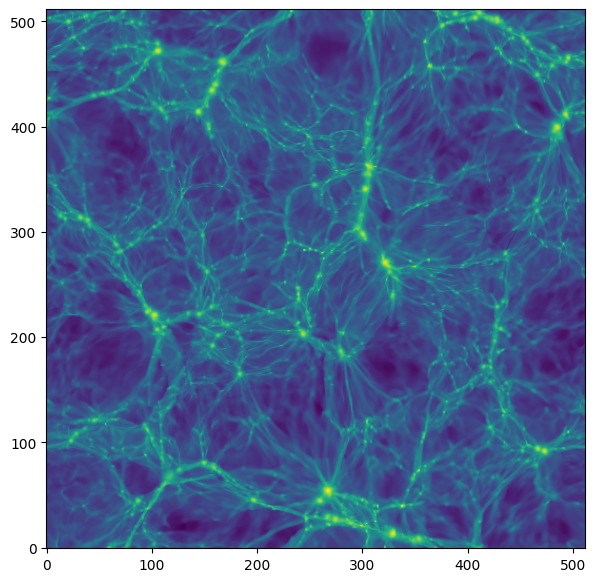

In [5]:
d_log = np.log10(d)
f=plt.figure(figsize=(7,7))
plt.imshow(d_log,origin='lower')

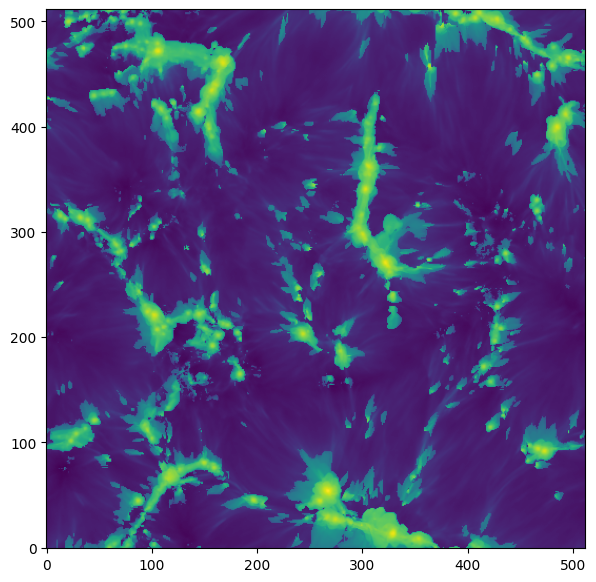

In [8]:
e_log = np.log10(energy)
f=plt.figure(figsize=(7,7))
plt.imshow(e_log,origin='lower')

# Making a 3-color image

Combining the density and energy maps into a three color image using HSV color space. 

In [9]:
d_min = d_log.min()
d_max = d_log.max()

v = (d_log - d_min)/(d_max - d_min)
s = 1.0 - v

In [10]:
e_min = e_log.min()
e_max = e_log.max()

h = 0.8 - 0.2*(e_log - e_min)/(e_max-e_min)

# Make a HSV image and then convert to RGB

In [11]:
hsv_image = np.zeros((512,512,3))

hsv_image[:,:,0] = h
hsv_image[:,:,1] = s
hsv_image[:,:,2] = v

rgb_image = colors.hsv_to_rgb(hsv_image)

Npw let's see the 3-color image

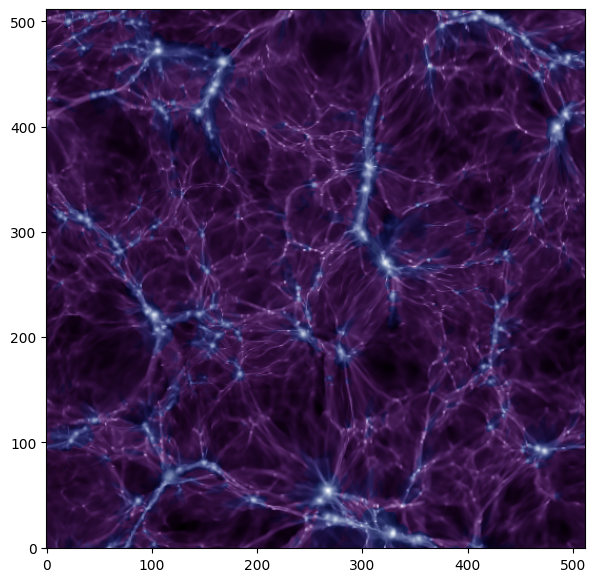

In [14]:
f=plt.figure(figsize = (7,7))
plt.imshow(rgb_image,origin='lower')

In [13]:
plt.imsave("test.png",rgb_image)